## HST WFC3/IR raw data preparation script

25 Feb 2025, J. Jensen 

Organize and combine individual raw.fits files for SBF analysis.
This needs stpipeline activated first. Before running jupyter, be sure to start from the right environment:
    bash -l, 
    conda activate stenv

Instructions for installing the reprocess program:
git clone https://github.com/gbrammer/reprocess_wfc3.git
cd reprocess_wfc3
pip install . -r requirements.txt
conda install hstcal -c http://ssb.stsci.edu/astroconda


In [1]:
import sys, os
 
# path of the pysbf folder
 
pysbf_path = "/Users/Joe/data/sbf/"

sys.path.insert(0, pysbf_path)
from pysbf import *

from matplotlib import image as mpimg 
 
configFolder = pysbf_path + "pysbf/config/sextractor/"

import astropy.io.fits as fits
import numpy as np
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

import reprocess_wfc3

In [23]:
# GO-17436 SNAP31
# HST_progid = "if7q"
# filt = "j"
# rawdata_root = "/Users/Joe/data/wfc3-17436-rawdata/"
# name = "n0050"; HST_visitid="01"; exposures=["we","wk","wp","wq"]; scale=39
# name = "n0194"; HST_visitid="02"; exposures=["mf","mg","n5","n6"]; scale=43
# name = "n0193"; HST_visitid="03"; exposures=["le","lf","lh","li"]; scale=109
# name = "n0227"; HST_visitid="04"; exposures=["i4","i5","i7","i8"]; scale=19
# name = "n0311"; HST_visitid="05"; exposures=["os","ot","ov","ow"]; scale=15
# name = "n0393"; HST_visitid="06"; exposures=["gw","gx","gz","h0"]; scale=72
# name = "n0499"; HST_visitid="07"; exposures=["ar","as","au","av"]; scale=54
# name = "n0508"; HST_visitid="08"; exposures=["d4","d5","d7","d8"]; scale=32
# name = "n0529"; HST_visitid="09"; exposures=["o5","o6","o8","o9"]; scale=34
# name = "n0541"; HST_visitid="10"; exposures=["en","eo","eq","er"]; scale=80
# name = "n0564"; HST_visitid="11"; exposures=["p9","pa","pc","pd"]; scale=93
# name = "n0759"; HST_visitid="12"; exposures=["eh","ei","el","ek"]; scale=37
##name = "eso197-g012"; HST_visitid="13"; exposures=["su","sy","t0","t2"]; scale=1 # complete loss, guiding failure
# name = "n0883"; HST_visitid="14"; exposures=["il","im","io","ip"]; scale=56
# name = "u01859"; HST_visitid="15"; exposures=["iy","iz","j1","j2"]; scale=18
# name = "ic1812"; HST_visitid="16"; exposures=["h1","h2","h4","h5"]; scale=43
# name = "n1057"; HST_visitid="17"; exposures=["ty","tz","u1","u2"]; scale=115
# name = "n1066"; HST_visitid="18"; exposures=["k7","k8","kb","kc"]; scale=36
# name = "ic0265"; HST_visitid="19"; exposures=["e8","e9","ec","ed"]; scale=43
# name = "ic0310"; HST_visitid="20"; exposures=["tw","tx","tz","u0"]; scale=23
# name = "n1270"; HST_visitid="21"; exposures=["c0","c1","c3","c4"]; scale=21
# name = "n1550"; HST_visitid="22"; exposures=["u9","ua","uc","ud"]; scale=40
# name = "n1609"; HST_visitid="23"; exposures=["r4","r8","rx","ry"]; scale=17
# name = "n1682"; HST_visitid="24"; exposures=["fc","fd","ff","fg"]; scale=36
# name = "n1710"; HST_visitid="25"; exposures=["f6","f7","f9","fa"]; scale=26
# name = "u03215"; HST_visitid="26"; exposures=["e5","e6","e8","e9"]; scale=31
# name = "n1713"; HST_visitid="27"; exposures=["sl","sm","so","sp"]; scale=130
# name = "u03683"; HST_visitid="28"; exposures=["xn","xo","xq","xr"]; scale=59
# name = "n2563"; HST_visitid="29"; exposures=["hk","hm","hr","hs"]; scale=65
# name = "ic2437"; HST_visitid="30"; exposures=["wv","ww","wy","wz"]; scale=54
# name = "n3260"; HST_visitid="31"; exposures=["f1","f2","f4","f5"]; scale=1 # complete guiding failure
# name = "n4782"; HST_visitid="47"; exposures=["hd","he","hg","hh"]; scale=52
# name = "n5357"; HST_visitid="63"; exposures=["ow","ox","oz","p0"]; scale=29
# name = "wkk6479"; HST_visitid="66"; exposures=["ef","eg","el","em"]; scale=30
# name = "n6502"; HST_visitid="67"; exposures=["pe","pf","ph","pi"]; scale=34
# name = "ic4842"; HST_visitid="68"; exposures=["qu","qv","qx","qy"]; scale=27
##name = "n6876"; HST_visitid="69"; exposures=["rl","rm","ro","rp"]; scale=1 # complete guiding failure
# name = "u00902"; HST_visitid="70"; exposures=["fp","fq","fx","fy"]; scale=37
# name = "n0641"; HST_visitid="71"; exposures=["fj","fk","fm","fn"]; scale=32
# name = "eso197-g010"; HST_visitid="72"; exposures=["eh","ei","ek","el"]; scale=39
# name = "eso153-g003"; HST_visitid="73"; exposures=["a9","aa","ap","aq"]; scale=109
##name = "eso197-g018"; HST_visitid="74"; exposures=["j6","ja","jc","je"]; scale=1 # complete guiding failure
# name = "n0997"; HST_visitid="75"; exposures=["hc","hd","hf","hg"]; scale=59
##name = "n1004"; HST_visitid="76"; exposures=["dl","dm","do","dp"]; scale=1 # complete guiding failure
# name = "n1044"; HST_visitid="77"; exposures=["ts","tt","tv","tw"]; scale=1 # complete guiding failure
# name = "n1226"; HST_visitid="78"; exposures=["iv","iw","iy","iz"]; scale=80
# name = "n1322"; HST_visitid="80"; exposures=["fi","fj","fl","fm"]; scale=46
# name = "2MASX-J04002709+3854173"; HST_visitid="81"; exposures=["x7","x8","xa","xb"]; scale=200
# name = "n1497"; HST_visitid="82"; exposures=["n0","n1","n3","n4"]; scale=29
# name = "2MASX-J04194579+3530344"; HST_visitid="83"; exposures=["xd","xe","xj","xk"]; scale=70
# name = "u03021"; HST_visitid="84"; exposures=["fx","fy","g0","g1"]; scale=81
##name = "n2303"; HST_visitid="85"; exposures=["sr","ss","su","sw"]; scale=1 # complete guiding failure
##name = "n2320"; HST_visitid="86"; exposures=["vx","vy","w0","w1"]; scale=1 # complete guiding failure
##name = "n2332"; HST_visitid="87"; exposures=["bq","bu","bw","by"]; scale=1 # complete guiding failure
# name = "n2340"; HST_visitid="88"; exposures=["xz","y0","y2","y3"]; scale=93
# name = "u03725"; HST_visitid="89"; exposures=["w3","w4","w9","wa"]; scale=40
##name = "u03812"; HST_visitid="90"; exposures=["ia","ib","j0","j1"]; scale=1 # complete guiding failure
# name = "mcg-01-23-019"; HST_visitid="91"; exposures=["if","ig","ii","ij"]; scale=29
# name = "n3222"; HST_visitid="92"; exposures=["kf","kg","ki","kj"]; scale=16
# name = "n3352"; HST_visitid="93"; exposures=["lf","lg","li","lj"]; scale=50
# name = "n3771"; HST_visitid="94"; exposures=["cv","cw","cy","cz"]; scale=64
# name = "n3172"; HST_visitid="95"; exposures=["fo","fp","fs","ft"]; scale=27
# name = "2m1154"; HST_visitid="96"; exposures=["kr","ks","ku","kz"]; scale=80
##name = "u10097"; HST_visitid="99"; exposures=["kk","kl","kn","ko"]; scale=1 # complete guiding failure
# name = "ic1153"; HST_visitid="0a"; exposures=["fc","fd","ff","fg"]; scale=32 
# name = "n6375"; HST_visitid="0b"; exposures=["d1","d2","d5","d6"]; scale=39
# name = "n6442"; HST_visitid="0c"; exposures=["z3","z4","z6","z7"]; scale=42
# name = "pcg61702"; HST_visitid="0e"; exposures=["ac","ar","at","au"]; scale=20 # nuclear point source saturated
# name = "eso141-g003"; HST_visitid="0f"; exposures=["au","av","b1","b3"]; scale=48
# name = "ic5180"; HST_visitid="0g"; exposures=["it","iu","j1","j2"]; scale=70
# name = "n7315"; HST_visitid="0h"; exposures=["pv","pw","py","pz"]; scale=39
# name = "u12179"; HST_visitid="0i"; exposures=["bi","bj","bm","bn"]; scale=42
# name = "cgcg551-015"; HST_visitid="0k"; exposures=["rq","rr","rt","ru"]; scale=38
##name = "pgc1001146"; HST_visitid="0l"; exposures=["vp","vq","wi","wj"]; scale=1 # complete guiding failure
# name = "ic0574"; HST_visitid="0m"; exposures=["ss","sr","su","sv"]; scale=40
# name = "n3343"; HST_visitid="0n"; exposures=["ve","vf","vh","vi"]; scale=54
# name = "ic0642"; HST_visitid="0p"; exposures=["xb","xc","xe","xf"]; scale=81
##name = "u12242"; HST_visitid="0r"; exposures=["nd","ne","ng","nh"]; scale=1 # complete guiding failure
# name = "n0071"; HST_visitid="0s"; exposures=["g1","g2","g4","g5"]; scale=59
# name = "n3426"; HST_visitid="0t"; exposures=["co","cp","cr","cs"]; scale=300
# name = "ic1143"; HST_visitid="0u"; exposures=["as","at","aw","ax"]; scale=46
# name = "u10918"; HST_visitid="0v"; exposures=["da","db","dd","de"]; scale=140
# outFolder = '/Users/Joe/data/wfc3-17436/' + name

#---------------------------
# GO-17446 SN31 (last reduced 17 Sep 2024)
# HST_progid = "if7r"
# filt = "j"
# rawdata_root = "/Users/Joe/data/wfc3-17446-rawdata/"
# name = "cgcg-005-038"; HST_visitid="01"; exposures=["c4","c5","c7","c9"]; scale=29 # pop="7" (but this one is bad--leaves residuals; not popped for now)
# name = "cgcg-031-049"; HST_visitid="02"; exposures=["bx","by","c0","c2"]; scale=62
# name = "cgcg-285-013"; HST_visitid="03"; exposures=["kr","ku","kx"]; scale=72  # pop="kq", pop="1" from the first one (not popped for now)
# name = "eso352-g057"; HST_visitid="04"; exposures=["ja","jb","jd","jf"]; scale=30
# name = "eso442-g015"; HST_visitid="05"; exposures=["cb","cc","ce","cg"]; scale=34
##name = "eso479-g007"; HST_visitid="06"; exposures=["r7","r8","ra","rc"]; scale=1 # first two are complete failiures due to guide problems.
# name = "eso479-g007"; HST_visitid="06"; exposures=["ra","rc"]; scale=40 
# name = "eso479-g007"; HST_visitid="30"; exposures=["vt","vu","vw","vy"]; scale=40
# name = "ic0511"; HST_visitid="07"; exposures=["yx","yy","z0","z2"]; scale=32
# name = "mcg-02-33-017"; HST_visitid="08"; exposures=["b1","b2","b4","b6"]; scale=27
# name = "cgcg097-050"; HST_visitid="09"; exposures=["up","uq","us","uw"]; scale=32
# name = "mcg+08-07-008"; HST_visitid="10"; exposures=["gg","gi","gk","gm"]; scale=120
# name = "u0402"; HST_visitid="11"; exposures=["bz","c0","c2","c4"]; scale=72
# name = "n0083"; HST_visitid="12"; exposures=["cz","d0","d2","d4"]; scale=43  # The cz file is czs_raw, not czq_raw
# name = "n1209"; HST_visitid="13"; exposures=["a7","a9","ae","ag"]; scale=18
# name = "n3332"; HST_visitid="14"; exposures=["a7","a8","aa","ac"]; scale=58  
# name = "n3643"; HST_visitid="15"; exposures=["dz","e0","e2","e4"]; scale=250 # pop="9" (not popped for now)
# name = "n3941"; HST_visitid="16"; exposures=["b8","b9","bb","bd"]; scale=7
# name = "n4125"; HST_visitid="17"; exposures=["ed","ee","eg","ei"]; scale=20
# name = "n4169"; HST_visitid="18"; exposures=["v0","v1","v4","v6"]; scale=23
# name = "n4415"; HST_visitid="19"; exposures=["j0","j1","j3","j5"]; scale=77
# name = "n4636"; HST_visitid="20"; exposures=["j7","j8","ja","jc"]; scale=80
# name = "n4767"; HST_visitid="21"; exposures=["y5","y6","y8","ya"]; scale=16
# name = "n5018"; HST_visitid="22"; exposures=["pi","pk","pn","pp"]; scale=7
# name = "n5222"; HST_visitid="23"; exposures=["hb","hc","hf","hh","hi","hk","hm","hn"]; scale=38
# name = "n5222"; HST_visitid="23"; exposures=["hb","hf","hi","hm"]; scale=38; filt = "j1" # two orbits for this observation
# name = "n5222"; HST_visitid="23"; exposures=["hc","hh","hk","hn"]; scale=38; filt = "j2" # combine the two separately after.
# name = "n5304"; HST_visitid="24"; exposures=["bf","bg","bi","bk"]; scale=28 # pop="8" (not popped for now)
# name = "n5419"; HST_visitid="25"; exposures=["bp","bq","bt","by"]; scale=100
# name = "n5631"; HST_visitid="26"; exposures=["iz","j0","j2","j7"]; scale=10
# name = "n7187"; HST_visitid="27"; exposures=["xb","xc","xg","xi"]; scale=38
# name = "leda1693718"; HST_visitid="28"; exposures=["fn","fo","fq","fs"]; scale=70
# name = "u2829"; HST_visitid="29"; exposures=["bs","c3","bw","ca","bt","c5","by","cb"]; scale=26 # Note: combine the two sets of four separately for autoclean to remove bad pixels.
# outFolder = '/Users/Joe/data/wfc3-17446/' + name

# GO-11712 2015 Calibrators
# HST_progid = "ib1h"
# filt = "j"
# rawdata_root = "/Users/Joe/data/wfc3-11712-rawdata/"
# name = "ic1919"; HST_visitid="01"; exposures=["im","io","iq","is"]; scale=460
# name = "ic2006"; HST_visitid="06"; exposures=["hz","i1","i3","i5"]; scale=16
# name = "n1344"; HST_visitid="03"; exposures=["r1","r3","r5","rc"]; scale=25
# name = "n1374"; HST_visitid="04"; exposures=["r5","r7","r9","rb"]; scale=13
# name = "n1375"; HST_visitid="02"; exposures=["lv","lw","ly","m0"]; scale=15
# name = "n1380"; HST_visitid="05"; exposures=["c6","c7","c9","cb"]; scale=13
# name = "n1399"; HST_visitid="08"; exposures=["n3","n4","n6","n8"]; scale=46
# name = "n1404"; HST_visitid="07"; exposures=["bn","bp","br","bt"]; scale=20
# name = "n4458"; HST_visitid="14"; exposures=["uo","uq","us","uu"]; scale=15
# name = "n4472"; HST_visitid="15"; exposures=["qg","qi","qk","qm"]; scale=51 # note that the first one coords are messed up by y=8 pix
# name = "n4489"; HST_visitid="13"; exposures=["iq","is","iu","iw"]; scale=31
# name = "n4649"; HST_visitid="16"; exposures=["eg","ei","ek","em"]; scale=45
# outFolder = '/Users/Joe/data/wfc3-11712-2024/' + name

# GO-15082 M89 = N4552 and others
# HST_progid = "idlj"
# rawdata_root = "/Users/Joe/data/wfc3-15082/rawdata"
# filt = "j"; name = "n4552"; HST_visitid="01"; exposures=["fc","fe","fk","fl"]; scale=14
# filt = "h"; name = "n4552"; HST_visitid="01"; exposures=["f9","fa","fg","fi"]; scale=1
# outFolder = '/Users/Joe/data/wfc3-15082/' + name

# GO-15226  N4697 and 6 others
# HST_progid = "idjq"
# rawdata_root = "/Users/Joe/data/wfc3-15226/rawdata"
# filt = "h"; name="n4697"; HST_visitid="04"; exposures=["gq","gr","gt","gv"]; scale=1
# filt = "j"; name="n4697"; HST_visitid="04"; exposures=["gx","gy"]; scale=7
# outFolder = '/Users/Joe/data/wfc3-15226/' + name

In [24]:
# set up output folder
if not os.path.isdir(outFolder):
        os.mkdir(outFolder)
outFolder += '/rawdata/'
if not os.path.isdir(outFolder):
        os.mkdir(outFolder)
print("Output data: ",outFolder)

oldpwd = os.getcwd()
os.chdir(rawdata_root)

Output data:  /Users/Joe/data/wfc3-17446/n5222/rawdata/


In [14]:
# there is one file with s instead of q in the file name. Copy to avoid breaking the code below.
if name=="n0083":
    !cp if7r12czs_raw.fits if7r12czq_raw.fits

02/17/2025 10:23:11 - reprocess_wfc3 - Make MULTIACCUM cube


reprocess_wfc3.show_MultiAccum_reads(raw='if7r23hiq_raw.fits')
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits


02/17/2025 10:23:13 - reprocess_wfc3 - Make plot


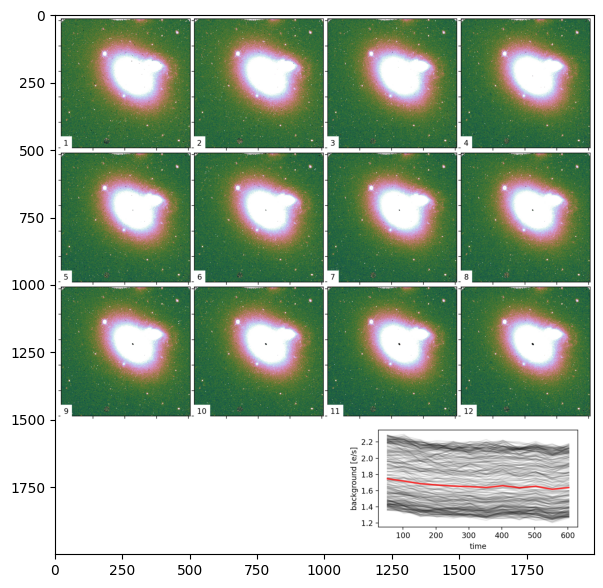

02/17/2025 10:23:16 - reprocess_wfc3 - Make MULTIACCUM cube


reprocess_wfc3.show_MultiAccum_reads(raw='if7r23hkq_raw.fits')
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits


02/17/2025 10:23:17 - reprocess_wfc3 - Make plot


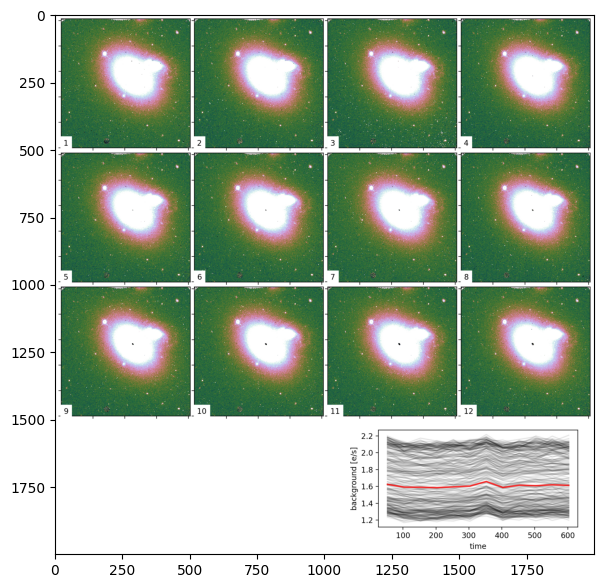

02/17/2025 10:23:20 - reprocess_wfc3 - Make MULTIACCUM cube


reprocess_wfc3.show_MultiAccum_reads(raw='if7r23hmq_raw.fits')
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits


02/17/2025 10:23:21 - reprocess_wfc3 - Make plot


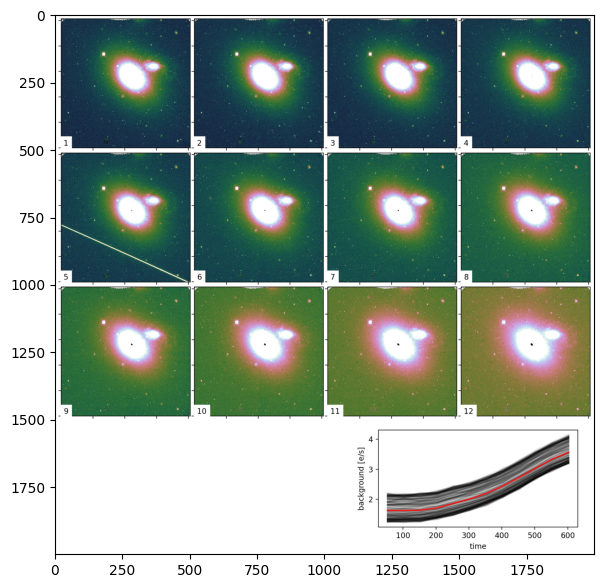

02/17/2025 10:23:25 - reprocess_wfc3 - Make MULTIACCUM cube


reprocess_wfc3.show_MultiAccum_reads(raw='if7r23hnq_raw.fits')
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits


02/17/2025 10:23:26 - reprocess_wfc3 - Make plot


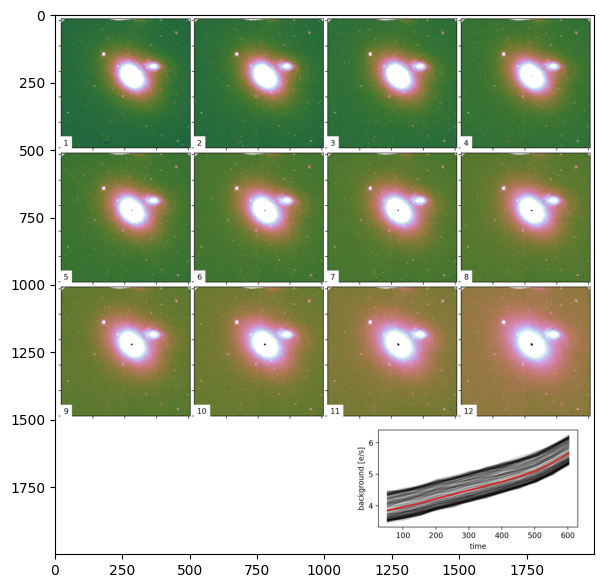

In [15]:
# Reprocess the raw WFC3 images:
for exposure in exposures:
    rawfile = HST_progid + HST_visitid + exposure + "q_raw.fits"
    rampfile = HST_progid + HST_visitid + exposure + "q_ramp.png"
    #print(rawfile)
    if os.path.isfile(rawfile):
        fig, ax = plt.subplots(figsize=(7, 7))
        print("reprocess_wfc3.show_MultiAccum_reads(raw='"+rawfile+"')")
        reprocess_wfc3.show_MultiAccum_reads(raw=rawfile)
        image = mpimg.imread(rampfile)
        ax.imshow(image)
        plt.show()
        
#os.chdir(oldpwd)

In [16]:
# Do the ramp slope correction

for exposure in exposures:
    rawfile = HST_progid + HST_visitid + exposure + "q_raw.fits"
    rampfile = HST_progid + HST_visitid + exposure + "q_ramp.png"
    if os.path.isfile(rawfile):
        print("reprocess_wfc3.make_IMA_FLT(raw='"+rawfile+"', remove_ima=True, fix_saturated=True, flatten_ramp=True)")
        reprocess_wfc3.make_IMA_FLT(raw=rawfile, remove_ima=True, fix_saturated=True, flatten_ramp=True)

#os.chdir(oldpwd)

reprocess_wfc3.make_IMA_FLT(raw='if7r23hiq_raw.fits', remove_ima=True, fix_saturated=True, flatten_ramp=True)
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits
git tag: UNKNOWN

git branch: UNKNOWN

HEAD @: UNKNOWN





CALBEG*** CALWF3 -- Version 3.6.2 (May-27-2021) ***

Begin    17-Feb-2025 10:23:51 MST





Input    if7r23hiq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open if7r23hiq_raw.fits...

Read in Primary header from if7r23hiq_raw.fits...

Warning    RPTCORR will be omitted because there's only one image.

RPTCORR will be omitted because there's only one image.

Creating new trailer file `if7r23hiq.tra'.





CALBEG*** WF3IR -- Version 3.6.2 (May-27

reprocess_wfc3.make_IMA_FLT(raw='if7r23hkq_raw.fits', remove_ima=True, fix_saturated=True, flatten_ramp=True)
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits
git tag: UNKNOWN

git branch: UNKNOWN

HEAD @: UNKNOWN





CALBEG*** CALWF3 -- Version 3.6.2 (May-27-2021) ***

Begin    17-Feb-2025 10:24:00 MST





Input    if7r23hkq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open if7r23hkq_raw.fits...

Read in Primary header from if7r23hkq_raw.fits...

Warning    RPTCORR will be omitted because there's only one image.

RPTCORR will be omitted because there's only one image.

Creating new trailer file `if7r23hkq.tra'.





CALBEG*** WF3IR -- Version 3.6.2 (May-27

git tag: UNKNOWN

git branch: UNKNOWN

HEAD @: UNKNOWN





CALBEG*** CALWF3 -- Version 3.6.2 (May-27-2021) ***

Begin    17-Feb-2025 10:24:08 MST





Input    if7r23hmq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open if7r23hmq_raw.fits...

Read in Primary header from if7r23hmq_raw.fits...

Warning    RPTCORR will be omitted because there's only one image.

RPTCORR will be omitted because there's only one image.

Creating new trailer file `if7r23hmq.tra'.





CALBEG*** WF3IR -- Version 3.6.2 (May-27-2021) ***

Begin    17-Feb-2025 10:24:08 MST

Input    if7r23hmq_raw.fits

Output   if7r23hmq_flt.fits

Trying to open if7r23hmq_raw.fits...

Read in Primary header from if7r23hmq_raw.fits...

APERTURE IR

FILTER   F110W

DETECTOR IR

Reading data from if7r23hmq_raw.fits ...

CCDTAB   iref$t2c16200i_ccd.fits

CCDTAB   PEDIGREE=Ground

CCDTAB   DESCRIP =Reference data based on Thermal-Vac #3, gain=2.5 results for IR-4

CCDTAB   DESCRIP =Readnoise,gain,saturati

reprocess_wfc3.make_IMA_FLT(raw='if7r23hnq_raw.fits', remove_ima=True, fix_saturated=True, flatten_ramp=True)
Calib: BPIXTAB=iref$9231739ni_bpx.fits
Calib: CCDTAB=iref$t2c16200i_ccd.fits
Calib: OSCNTAB=iref$q911321mi_osc.fits
Calib: CRREJTAB=iref$u6a1748ri_crr.fits
Calib: DARKFILE=iref$8ai2007ei_drk.fits
Calib: NLINFILE=iref$u1k1727mi_lin.fits
Calib: PFLTFILE=iref$4ac1921ri_pfl.fits
Calib: IMPHTTAB=iref$8ch15233i_imp.fits
Calib: IDCTAB=iref$w3m18525i_idc.fits
git tag: UNKNOWN

git branch: UNKNOWN

HEAD @: UNKNOWN





CALBEG*** CALWF3 -- Version 3.6.2 (May-27-2021) ***

Begin    17-Feb-2025 10:24:23 MST





Input    if7r23hnq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open if7r23hnq_raw.fits...

Read in Primary header from if7r23hnq_raw.fits...

Warning    RPTCORR will be omitted because there's only one image.

RPTCORR will be omitted because there's only one image.

Creating new trailer file `if7r23hnq.tra'.





CALBEG*** WF3IR -- Version 3.6.2 (May-27

In [7]:
# Pop out reads that have satellites in them:

#--------17446--------
#reprocess_wfc3.make_IMA_FLT(raw='if7r01c4q_raw.fits', pop_reads=[7], remove_ima=True, fix_saturated=True, flatten_ramp=True)

#popping this read does NOT completely remove the trail. The earliest part of the trail persists.
#reprocess_wfc3.make_IMA_FLT(raw='if7r03kqq_raw.fits', pop_reads=[1], remove_ima=True, fix_saturated=True, flatten_ramp=True)

#reprocess_wfc3.make_IMA_FLT(raw='if7r12czs_raw.fits', remove_ima=True, fix_saturated=True, flatten_ramp=True)
#! cp if7r12czs_flt.fits if7r12czq_flt.fits

#reprocess_wfc3.make_IMA_FLT(raw='if7r15e2q_raw.fits', pop_reads=[9], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7r23hmq_raw.fits', pop_reads=[5], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7r24bfq_raw.fits', pop_reads=[8], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7r26j7q_raw.fits', pop_reads=[6], remove_ima=True, fix_saturated=True, flatten_ramp=True)

#--------17436---------
#reprocess_wfc3.make_IMA_FLT(raw='if7q66elq_raw.fits', pop_reads=[10], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7q66emq_raw.fits', pop_reads=[2], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7q73a9q_raw.fits', pop_reads=[10], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7q94cvq_raw.fits', pop_reads=[9], remove_ima=True, fix_saturated=True, flatten_ramp=True)
#reprocess_wfc3.make_IMA_FLT(raw='if7q26e5q_raw.fits', pop_reads=[4], remove_ima=True, fix_saturated=True, flatten_ramp=True)

# guiding failure on the first read
# reprocess_wfc3.make_IMA_FLT(raw='if7q0uasq_raw.fits', pop_reads=[1], remove_ima=True, fix_saturated=True, flatten_ramp=True)

# reprocess_wfc3.make_IMA_FLT(raw='if7q0earq_raw.fits', pop_reads=[10], remove_ima=True, fix_saturated=True, flatten_ramp=True)
# reprocess_wfc3.make_IMA_FLT(raw='if7q0eatq_raw.fits', pop_reads=[1,8], remove_ima=True, fix_saturated=True, flatten_ramp=True)
# reprocess_wfc3.make_IMA_FLT(raw='if7q0sg5q_raw.fits', pop_reads=[10], remove_ima=True, fix_saturated=True, flatten_ramp=True)
# reprocess_wfc3.make_IMA_FLT(raw='if7q0gj2q_raw.fits', pop_reads=[7], remove_ima=True, fix_saturated=True, flatten_ramp=True)

In [8]:
#os.chdir(oldpwd)


# Next step: combine images

In [25]:
# set up files for monsta/autoclean

# change directory to raw data directory
#oldpwd = os.getcwd()
#os.chdir(rawdata_root)

for idx, exposure in enumerate(exposures,start=1):
    fltfile = HST_progid + HST_visitid + exposure + "q_flt.fits"
    if os.path.isfile(fltfile):

        # Use WCS to determine integer offsets
        f = fits.open(fltfile)
        exptime = f[0].header['EXPTIME']
        print('Exposure time '+str(idx)+' =',exptime)
        w = WCS(f[1].header)
        if idx == 1:
            sky = w.pixel_to_world(0, 0)
        x, y = w.world_to_pixel(sky)
        xoff = str(int(-np.round(x)))
        yoff = str(int(-np.round(y)))
        # print(xoff,yoff)
        f.close()
        
        # Make the shifted images for combining
        monsta_script = ""
        max = 0.

        monsta_script += """
            rd """+str(idx)+""" '"""+fltfile+"""'
            clip """+str(idx)+""" nan=0
            shift """+str(idx)+""" dx="""+xoff+""" dy="""+yoff+"""
            wd """+str(idx)+""" '"""+outFolder+name+filt+"""psf.00"""+str(idx)+"""'
            mc """+str(idx)+""" """+str(scale)+"""
            wd """+str(idx)+""" '"""+outFolder+name+filt+""".00"""+str(idx)+"""'
            """
        # Make the images         
        run_monsta(monsta_script, 'monsta.pro', 'monsta.log')
    

Exposure time 1 = 602.937317
Exposure time 2 = 602.937317
Exposure time 3 = 602.937317
Exposure time 4 = 602.937317


In [26]:
# Run autoclean
oldpwd = os.getcwd()
os.chdir(outFolder)
monsta_script = ""

file = name + filt + '.001'
if os.path.isfile(file):              
    argstring = file + " " + str(idx) + " etime tkey='EXPTIME' level=0.1,0.99 trigger=25,5,3 scour=25,5,3"
    print('autoclean ',argstring)
    ! autoclean {argstring}

# Take the scale factor back out.
file = name+filt+'.cln'
if os.path.isfile(file):              
    monsta_script += """
    rd 1 '"""+name+filt+""".cln'
    dc 1 """+str(scale)+"""
    mc 1 """+str(exptime)+"""
    wd 1 '"""+name+filt+""".fits'
    """   
    run_monsta(monsta_script, 'monsta.pro', 'monsta.log')
            
os.chdir(oldpwd)


autoclean  n5222j2.001 4 etime tkey='EXPTIME' level=0.1,0.99 trigger=25,5,3 scour=25,5,3
 Autoclean 4.25                
File  1  n5222j2.001          0     0  1014  1014   603
File  2  n5222j2.002         -8    -3  1014  1014   603
File  3  n5222j2.003         -5    -8  1014  1014   603
File  4  n5222j2.004          3    -5  1014  1014   603
 Data read...
      0.100     0.990 percentiles at pixel value     46    623
 Finding pixels at chosen contours for scaling...
Gain (e/ADU from ave/var) =  16.093
   N    dX    dY    t   #1 = A * #i  +  B       r      flux      sky      rms
   1     0     0   603   1.0000      0.000   1.0000   1.0000      0.00    1.00
   2    -8    -3   603   1.0000   -139.159   1.0000   1.0000      0.00    1.00
   3    -5    -8   603   1.0000     -0.659   1.0000   1.0000      0.00    1.00
   4     3    -5   603   1.0000   -116.309   1.0000   1.0000      0.00    1.00
 ***> Row 1020, 11688 CR pixels zapped
 Now scouring each image for further CR...
Image  1:      4